<a href="https://colab.research.google.com/gist/jcheong0428/c16146b386ea60fab888b56e8e5ee747/openface_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Feature Detection with OpenFace

This notebook uses an open source project [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace) by Tadas Baltrusaitis to detect and track single/multi-person head motions and facial muscle movements on a given Youtube video. This notebook was inspired by [DL-CoLab-Notebooks](https://github.com/tugstugi/dl-colab-notebooks).

Instead of `FaceLandmarkVidMulti` you may also use `FeatureExtraction` to extract features of a single face or `FaceLandmarkImg` to extract 3333features on a face image. See full description of the arguments [here](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Command-line-arguments). 

In [2]:
#import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os 
import time
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
pwd

'c:\\Users\\us98\\PycharmProjects\\elderReactProject'

In [4]:
# base_dir = '/var/dataset/ElderReact_Data/ElderReact_train/'
base_dir = 'C:\\Users\\us98\\PycharmProjects\\elderReactProject\\ElderReact\\ElderReact_Data\\ElderReact_train\\'
filename =  '50_50_106'
 
FILENAME = base_dir + filename + '.mp4'
os.system('mkdir ' + filename)
# os.system('./OpenFace/build/bin/FeatureExtraction -f ' +  FILENAME + ' -out_dir processed/' + filename)
os.system('C:\\Users\\us98\\PycharmProjects\\elderReactProject\\OpenFace\\FeatureExtraction.exe -f ' +  FILENAME + ' -out_dir processed\\' + filename)
# os.system('ffmpeg -y -loglevel info -i processed/' + filename + '/' +  filename + '.avi processed/' + filename + '/' + filename + '.mp4')
os.system('ffmpeg -y -loglevel info -i processed\\' + filename + '\\' +  filename + '.avi processed\\' + filename + '\\' + filename + '.mp4')

0

Finally, visualize the result:

In [5]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))
outputVideo = 'processed/' + filename + '/' + filename + '.mp4' 
show_local_mp4_video(outputVideo, width=960, height=720)

# Extra: Here are some tips for loading and plotting the data. 

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt 

# Load data
df = pd.read_csv('processed/'+ filename + '/' + filename + '.csv')
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head()

Max number of frames 150 
Total shape of dataframe (150, 714)


,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.353427,0.382237,-0.853806,-0.052289,0.399411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0.042,0.93,1,0.346216,0.385346,-0.855361,-0.061761,0.413218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.083,0.98,1,0.313209,0.326706,-0.891719,-0.070477,0.396373,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,0,0.125,0.98,1,0.323851,0.242202,-0.914581,-0.034010,0.339218,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,0,0.167,0.98,1,0.224211,0.089037,-0.970465,-0.021076,0.202982,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
df



,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.353427,0.382237,-0.853806,-0.052289,0.399411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0.042,0.93,1,0.346216,0.385346,-0.855361,-0.061761,0.413218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.083,0.98,1,0.313209,0.326706,-0.891719,-0.070477,0.396373,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,0,0.125,0.98,1,0.323851,0.242202,-0.914581,-0.034010,0.339218,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,0,0.167,0.98,1,0.224211,0.089037,-0.970465,-0.021076,0.202982,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0,6.048,0.98,1,0.265661,0.186083,-0.945937,-0.073752,0.185213,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
146,147,0,6.089,0.98,1,0.290497,0.182550,-0.939301,-0.068625,0.189852,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
147,148,0,6.131,0.98,1,0.329104,0.160297,-0.930589,-0.071540,0.187374,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
148,149,0,6.173,0.98,1,0.306822,0.172663,-0.935974,-0.073177,0.167634,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# See how many unique faces there are
print("Number of unique faces: ", len(df.face_id.unique()), "\nList of face_id's: ", df.face_id.unique())

Number of unique faces:  1 
List of face_id's:  [0]


In [11]:
df.groupby('face_id').mean()['confidence']

face_id
0    0.979
Name: confidence, dtype: float64

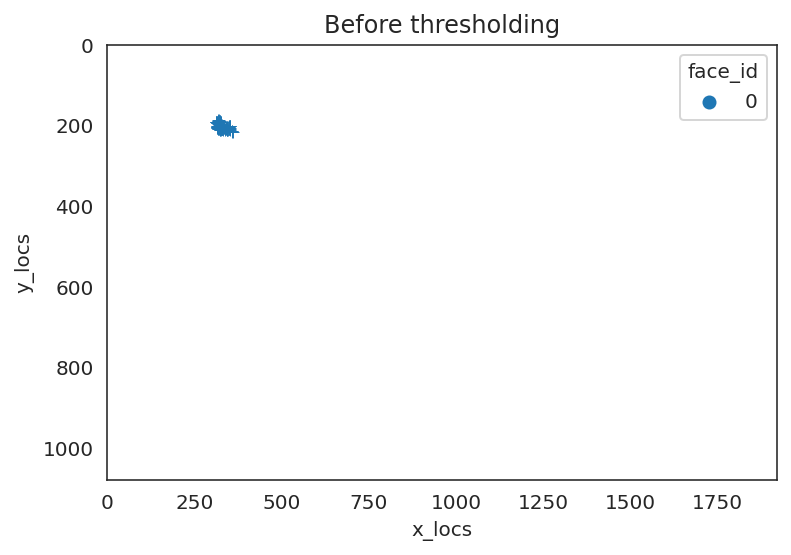

In [12]:
import re
x_regex_pat = re.compile(r'^x_[0-9]+$')
y_regex_pat = re.compile(r'^y_[0-9]+$')
x_locs = df.columns[df.columns.str.contains(x_regex_pat)]
y_locs = df.columns[df.columns.str.contains(y_regex_pat)]

no_unique_faces = len(df.face_id.unique())
palette = sns.color_palette()  

avg_face_df = pd.DataFrame({'x_locs':df[x_locs].mean(axis=1), 'y_locs':df[y_locs].mean(axis=1), 'face_id': df.face_id})
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df, marker="+")#, palette=palette)
ax.set(xlim=[0, 1920], ylim=[1080,0], title="Before thresholding");

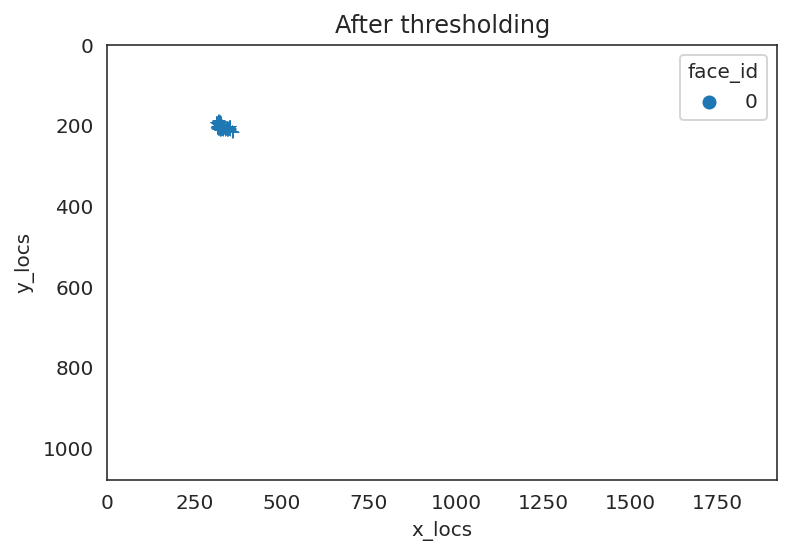

In [13]:
avg_face_df_conf = avg_face_df[df.confidence>=.80]
no_unique_faces = len(avg_face_df_conf.face_id.unique())
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df_conf, marker="+", palette=palette[:no_unique_faces])
ax.set(xlim=[0, 1920], ylim=[1080,0], title="After thresholding");

Let's clean our data with a threshold of 80% confidence and plot the AU trajectories for all AUs.


List of AU columns: Index(['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r',
       'AU25_r', 'AU26_r', 'AU45_r'],
      dtype='object')


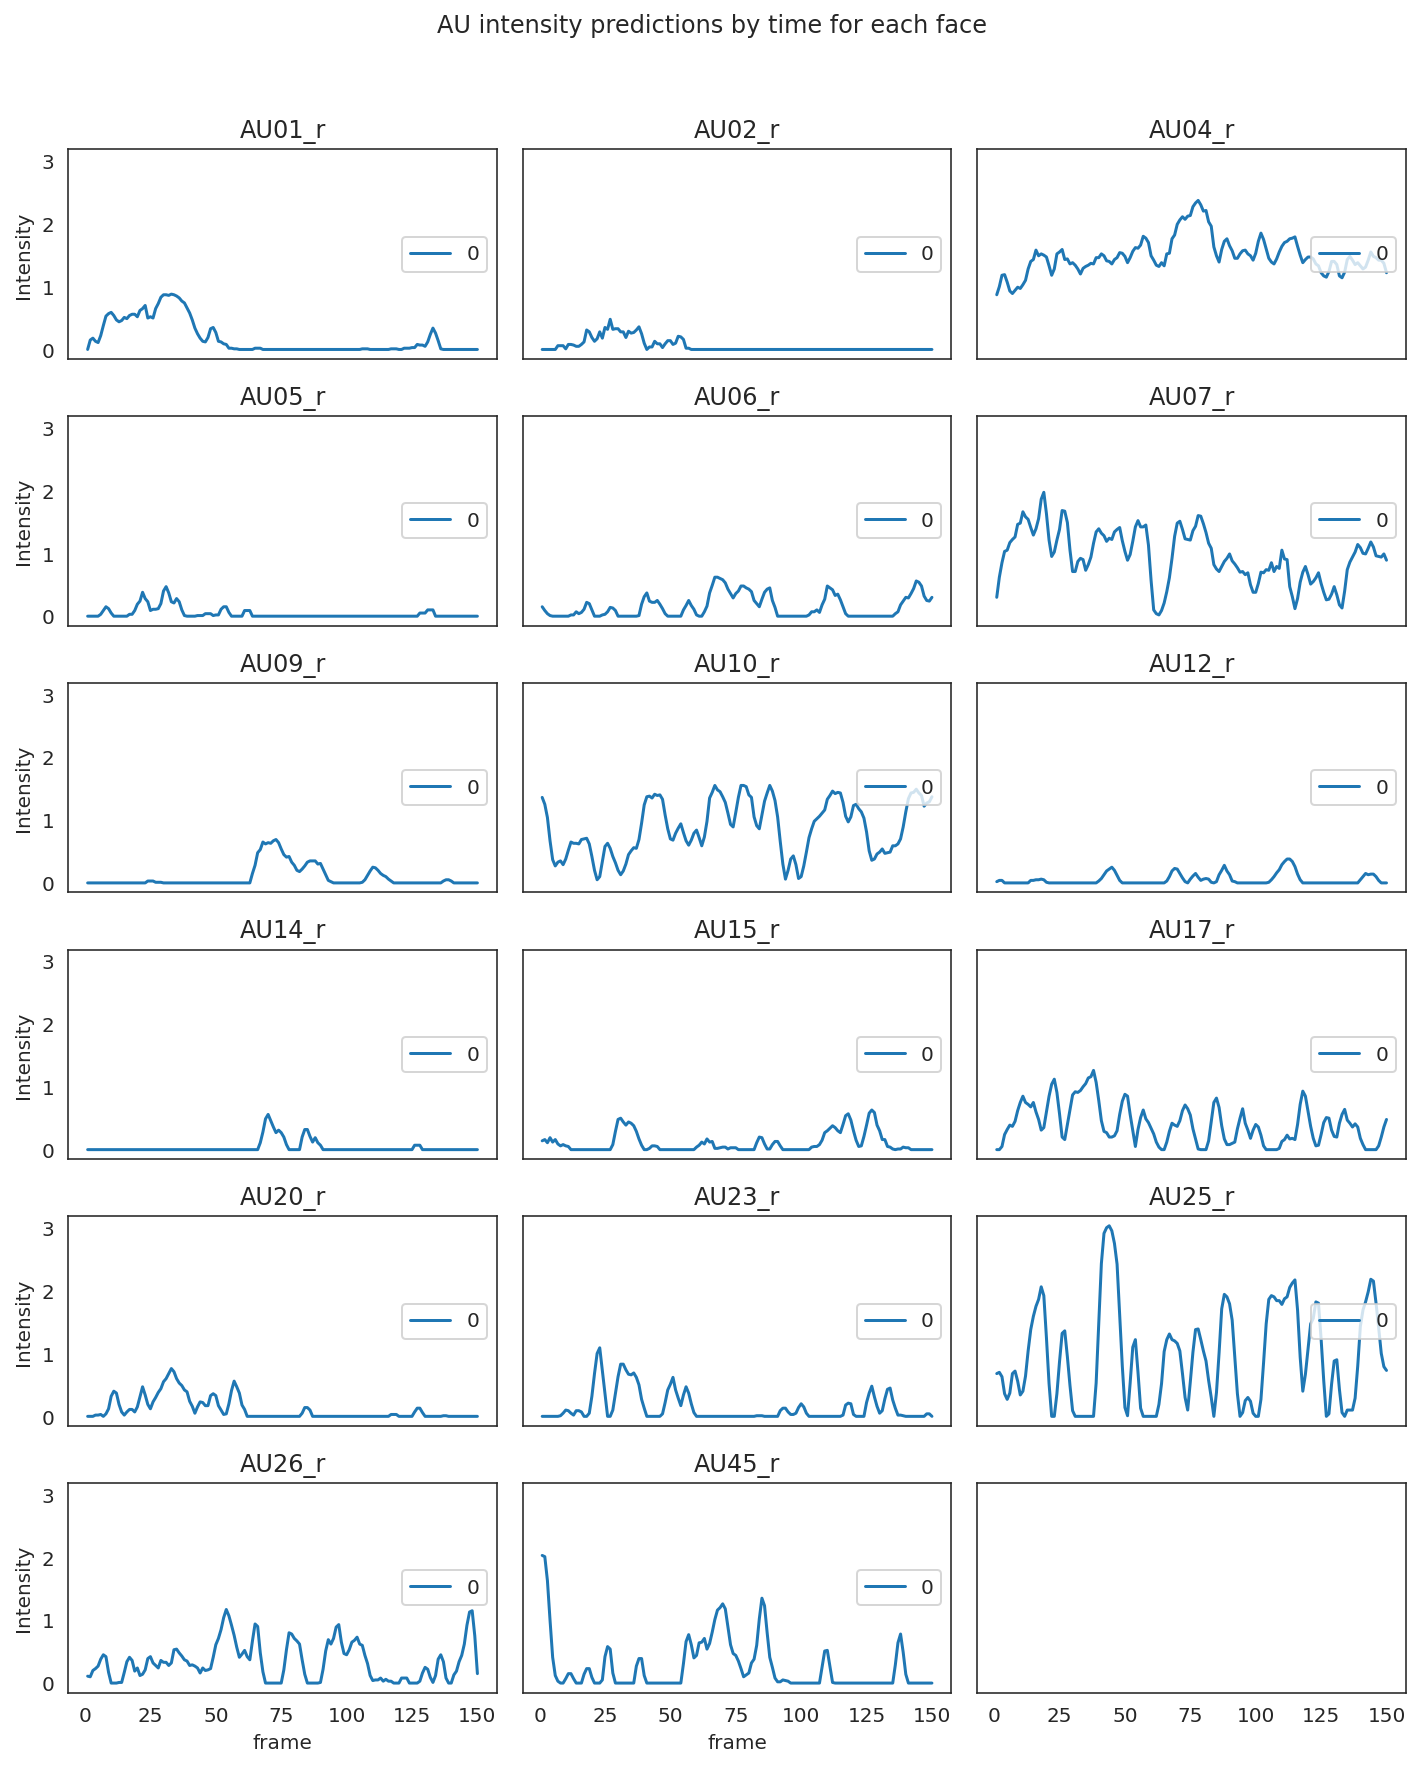

In [14]:
# Threshold data by 80%
df_clean = df[df.confidence>=.80]
# Plot all Action Unit time series. 
au_regex_pat = re.compile(r'^AU[0-9]+_r$')
au_columns = df.columns[df.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel='Intensity')
    axes[au_ix].legend(loc=5)
plt.suptitle("AU intensity predictions by time for each face", y=1.02)
plt.tight_layout()

We could also compare how synchronized each individuals are to one another during the interaction by using a simple Pearson correlation.

In [15]:
# Let's compare how much AU12 (smiling) activity occurs at similar times across people.
df_clean.pivot(index='frame', columns='face_id', values='AU12_r').corr()

face_id,0
face_id,
0,1.0


# Lastly, here is just a few lines of code to get you started on working with gaze directions. 

TypeError: ignored

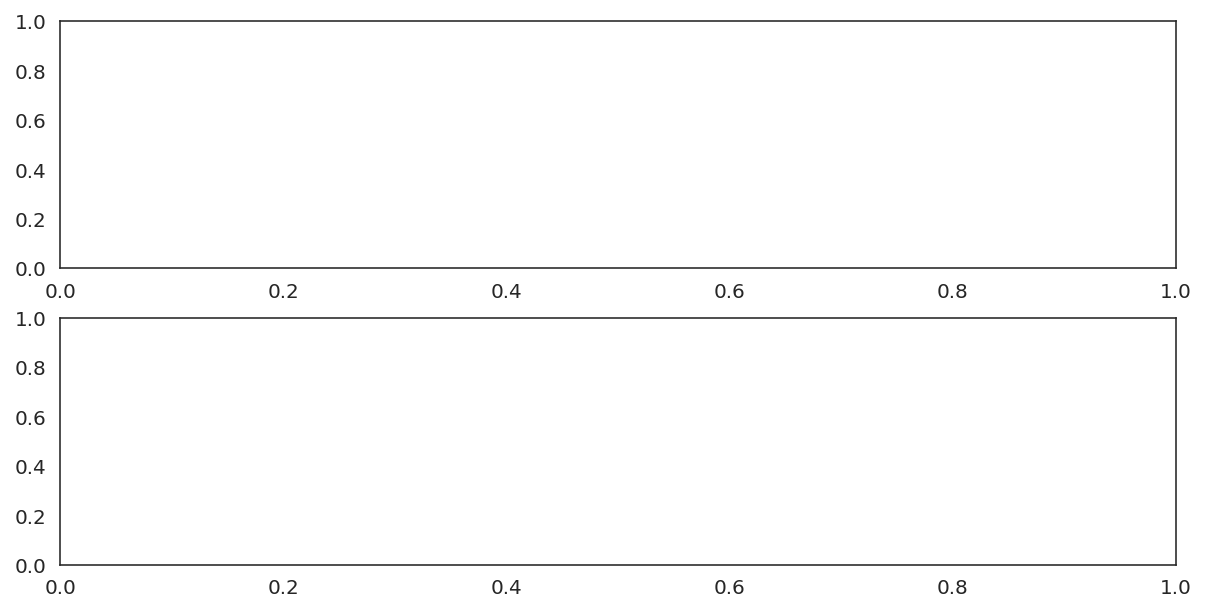

In [16]:
f,axes = plt.subplots(2,len(df_clean.face_id.unique()), figsize=(10,5))
for faces_ix, face_id in enumerate(df_clean.face_id.unique()[::-1]):
  df_clean.query(f'face_id=={face_id}').plot.scatter(x='gaze_angle_x', y='gaze_angle_y', ax=axes[0][faces_ix])
  axes[0][faces_ix].scatter(0,0, marker='x', color = 'k') # draw origin.
  axes[0][faces_ix].set(xlim=[-2,2], ylim=[-2,2], title=f'Gaze movement of face_id=={face_id}')
  df_clean.query(f'face_id=={face_id}')[['gaze_angle_x', 'gaze_angle_y']].plot(ax=axes[1][faces_ix])
  axes[1][faces_ix].set(ylim=[-1.5,1.5], xlabel='Frame Number', ylabel="Radians")
plt.tight_layout()
plt.show()

# That's it for now. Hope you enjoyed this tutorial.

## Additional resources
*   [OpenFace Github Page](https://github.com/TadasBaltrusaitis/OpenFace)
*   [Medium article on more ways to assess synchrony in time series data](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)
*   [Comparison of facial emotion recognition software: OpenFace vs Affectiva vs FACET](https://medium.com/@jinhyuncheong/face-analysis-software-comparison-affectiva-affdex-vs-openface-vs-emotient-facet-5f91a4f12cbb)

*This notebook was prepared by [Jin Hyun Cheong](http://jinhyuncheong.com).*